In [1]:
from pytrends.request import TrendReq
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
from IPython.display import Image
# Who is in space right now?
import requests
r = requests.get(url='http://api.open-notify.org/astros.json')
r.json()

{'message': 'success',
 'number': 7,
 'people': [{'craft': 'ISS', 'name': 'Sergey Ryzhikov'},
  {'craft': 'ISS', 'name': 'Kate Rubins'},
  {'craft': 'ISS', 'name': 'Sergey Kud-Sverchkov'},
  {'craft': 'ISS', 'name': 'Mike Hopkins'},
  {'craft': 'ISS', 'name': 'Victor Glover'},
  {'craft': 'ISS', 'name': 'Shannon Walker'},
  {'craft': 'ISS', 'name': 'Soichi Noguchi'}]}

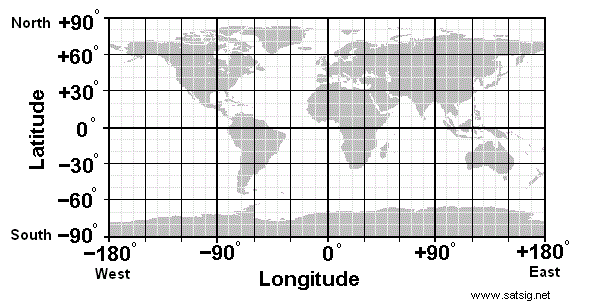

In [2]:
Image(filename='satsig_explanation.gif', width='60%')

In [90]:
r = requests.get(url='http://api.open-notify.org/iss-now.json')
space_station_location = (r.json())
print(space_station_location)

space_station_location['iss_position']['latitude']
space_station_location['iss_position']['longitude']
space_station_location['timestamp']

{'message': 'success', 'timestamp': 1616069666, 'iss_position': {'latitude': '35.9250', 'longitude': '106.2911'}}


1616069666

Text(0.5, 1.0, 'International Space Station Location')

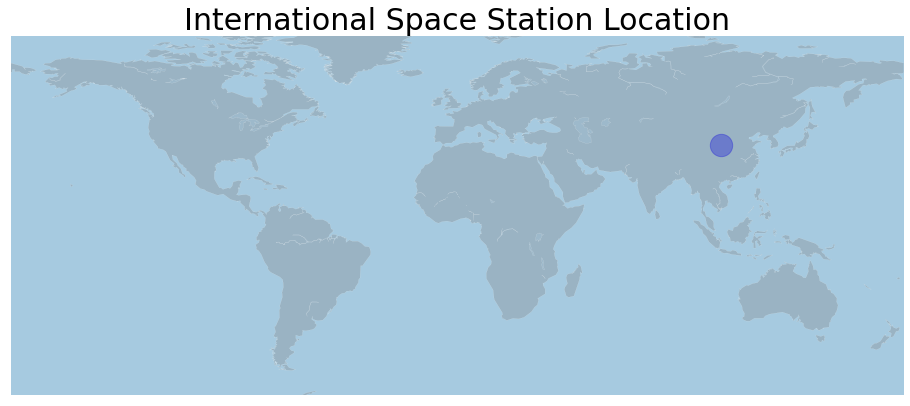

In [91]:
# let's plot the ISS current location
# you will need to pip install Basemap - https://matplotlib.org/basemap/users/installing.html
from mpl_toolkits.basemap import Basemap
import os
os.environ['PROJ_LIB'] = r'C:\Users\Gulshan\anaconda\pkgs\proj-7.2.0-h3e70539_0\Library\share'

# Set the dimension of the figure
plt.figure(figsize=(16, 8))

# Make the background map
m=Basemap(llcrnrlon=-180, llcrnrlat=-65,urcrnrlon=180,urcrnrlat=80)
m.drawmapboundary(fill_color='#A6CAE0', linewidth=0)
m.fillcontinents(color='grey', alpha=0.3)
m.drawcoastlines(linewidth=0.1, color="white")

m.scatter(float(space_station_location['iss_position']['longitude']), 
          float(space_station_location['iss_position']['latitude']), 
          s=500, alpha=0.4,color='blue')

 
plt.title('International Space Station Location' , fontsize=30)

In [92]:
# load historical data
iss_flight_record = pd.read_csv('ISS_location_20210318155202.csv')
iss_flight_record.head()


,timestamp,latitude,longitude
0,1616062921,-21.0191,82.1309
1,1616062980,-18.1504,84.5490
2,1616063040,-15.1961,86.9196
3,1616063101,-12.2118,89.2177
4,1616063161,-9.2038,91.4591


In [93]:
iss_flight_record.shape

(80, 3)

In [94]:
from datetime import datetime
date_time = [datetime.fromtimestamp(dt) for dt in iss_flight_record['timestamp']]
date_time
# add teh date_time to a new column in our data frame iss_flight_record
iss_flight_record['date'] = date_time
iss_flight_record.head()
# add an plot size from oldest to newest
iss_flight_record['index'] = range(1,len(iss_flight_record)+1)
iss_flight_record.head()


,timestamp,latitude,longitude,date,index
0,1616062921,-21.0191,82.1309,2021-03-18 15:52:01,1
1,1616062980,-18.1504,84.5490,2021-03-18 15:53:00,2
2,1616063040,-15.1961,86.9196,2021-03-18 15:54:00,3
3,1616063101,-12.2118,89.2177,2021-03-18 15:55:01,4
4,1616063161,-9.2038,91.4591,2021-03-18 15:56:01,5


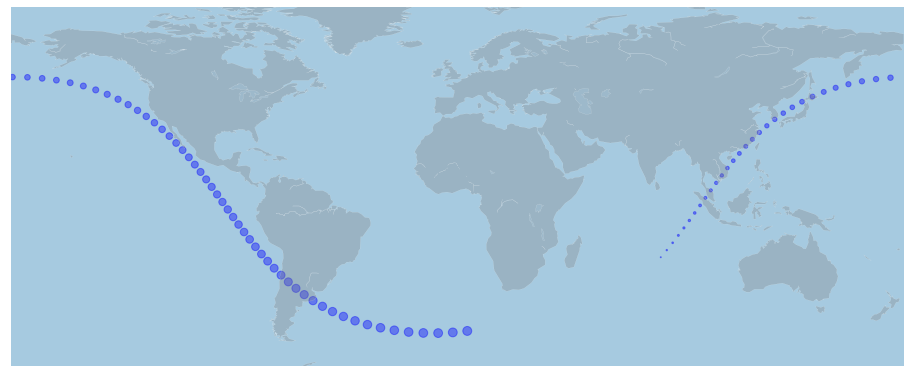

In [95]:
# you will need to pip install Basemap - https://matplotlib.org/basemap/users/installing.html
from mpl_toolkits.basemap import Basemap

# Set the dimension of the figure
plt.figure(figsize=(16, 8))

# Make the background map
m=Basemap(llcrnrlon=-180, llcrnrlat=-65,urcrnrlon=180,urcrnrlat=80)
m.drawmapboundary(fill_color='#A6CAE0', linewidth=0)
m.fillcontinents(color='grey', alpha=0.3)
m.drawcoastlines(linewidth=0.1, color="white")

 
 
m.scatter(iss_flight_record['longitude'], 
          iss_flight_record['latitude'], 
          s=iss_flight_record['index'] , alpha=0.4,color='blue')

 
#plt.title('International Space Station Location' , fontsize=30) 


In [134]:
# each dot represents one minute - can we predict where it will be in the next 10 minutes?
tmp_df = iss_flight_record.tail(10)
tmp_df

,timestamp,latitude,longitude,date,index
70,1616067120,-44.8962,-45.8465,2021-03-18 17:02:00,71
71,1616067180,-46.6581,-41.1503,2021-03-18 17:03:00,72
72,1616067241,-48.1926,-36.1439,2021-03-18 17:04:01,73
73,1616067300,-49.4635,-30.8862,2021-03-18 17:05:00,74
74,1616067360,-50.4669,-25.3205,2021-03-18 17:06:00,75
75,1616067420,-51.1685,-19.5426,2021-03-18 17:07:00,76
76,1616067481,-51.5518,-13.6220,2021-03-18 17:08:01,77
77,1616067541,-51.6069,-7.6413,2021-03-18 17:09:01,78
78,1616067600,-51.3361,-1.7403,2021-03-18 17:10:00,79
79,1616067660,-50.7417,4.0960,2021-03-18 17:11:00,80


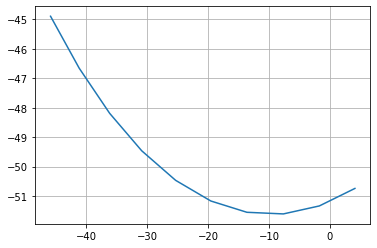

In [135]:
plt.plot(tmp_df['longitude'],tmp_df['latitude'])
plt.grid()

#//last20 mins record  of iss plotted 

In [136]:
from scipy import stats
slope, intercept, r_value, p_value, std_err = stats.linregress(
    x = tmp_df['longitude'],
    y = tmp_df['latitude'])


print('intercept: ', intercept)
print('slope: ', slope)

intercept:  -52.12846730428957
slope:  -0.11571464994515888


In [147]:
# predict longitude 1 periods out
predicted_latitude = np.ceil(slope *10 + intercept)

print('Next predicted point:', predicted_latitude)

Next predicted point: -53.0


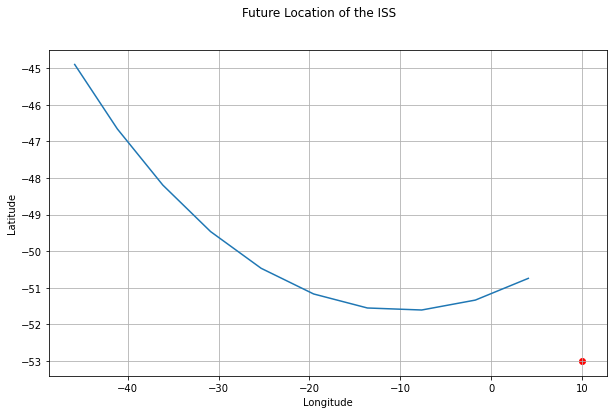

In [148]:
fig, ax = plt.subplots(figsize=(10, 6))

plt.plot(tmp_df['longitude'],
    tmp_df['latitude'])

plt.suptitle('Future Location of the ISS')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.grid()

plt.scatter([10], [predicted_latitude], color='red')

In [161]:
x = tmp_df['longitude']
y = tmp_df['latitude']

poly_regression = np.poly1d(np.polyfit(x, y, 3))

predicted_latitude =  poly_regression(20)

print('Next predicted point:', predicted_latitude)

Next predicted point: -47.99055366983447


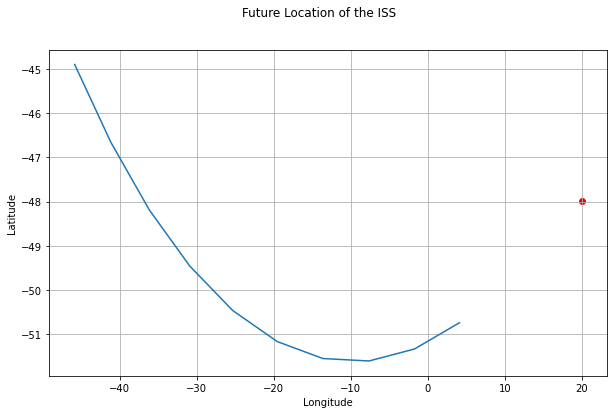

In [162]:
fig, ax = plt.subplots(figsize=(10, 6))

plt.plot(tmp_df['longitude'],
    tmp_df['latitude'])

plt.suptitle('Future Location of the ISS')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.grid()

plt.scatter((20), [predicted_latitude], color='red')

In [13]:
import datetime
date_to_print = datetime.datetime.now().strftime("%Y%m%d%H%M%S")
date_to_print

'20210318155202'

In [14]:
import time
starttime=time.time()
space_station_data = []
while True: 
    r = requests.get(url='http://api.open-notify.org/iss-now.json')
    space_station_location = (r.json())
    print(space_station_location)

    space_station_data.append([space_station_location['timestamp'],
                            space_station_location['iss_position']['latitude'],
                            space_station_location['iss_position']['longitude']
                            ])

    # dump copy to file
    tmp_space_station_data_df = pd.DataFrame(space_station_data, columns=['timestamp','latitude', 'longitude',])
    tmp_space_station_data_df.to_csv('ISS_location_' + date_to_print + '.csv', index=None)

    # safety break
    if len(space_station_data) > 18000:
        break

    # let it sleep 60 seconds
    # https://stackoverflow.com/questions/474528/what-is-the-best-way-to-repeatedly-execute-a-function-every-x-seconds-in-python
    time.sleep(60.0 - ((time.time() - starttime) % 30.0))

{'message': 'success', 'iss_position': {'longitude': '82.1309', 'latitude': '-21.0191'}, 'timestamp': 1616062921}
{'message': 'success', 'iss_position': {'longitude': '84.5490', 'latitude': '-18.1504'}, 'timestamp': 1616062980}
{'message': 'success', 'iss_position': {'longitude': '86.9196', 'latitude': '-15.1961'}, 'timestamp': 1616063040}
{'message': 'success', 'iss_position': {'longitude': '89.2177', 'latitude': '-12.2118'}, 'timestamp': 1616063101}
{'message': 'success', 'iss_position': {'longitude': '91.4591', 'latitude': '-9.2038'}, 'timestamp': 1616063161}
{'message': 'success', 'iss_position': {'longitude': '93.6404', 'latitude': '-6.2039'}, 'timestamp': 1616063220}
{'message': 'success', 'iss_position': {'longitude': '95.8123', 'latitude': '-3.1675'}, 'timestamp': 1616063280}
{'message': 'success', 'iss_position': {'longitude': '97.9705', 'latitude': '-0.1247'}, 'timestamp': 1616063341}
{'message': 'success', 'iss_position': {'longitude': '100.1284', 'latitude': '2.9186'}, 'tim

{'message': 'success', 'iss_position': {'longitude': '-36.1439', 'latitude': '-48.1926'}, 'timestamp': 1616067241}
{'message': 'success', 'iss_position': {'longitude': '-30.8862', 'latitude': '-49.4635'}, 'timestamp': 1616067300}
{'message': 'success', 'iss_position': {'longitude': '-25.3205', 'latitude': '-50.4669'}, 'timestamp': 1616067360}
{'message': 'success', 'iss_position': {'longitude': '-19.5426', 'latitude': '-51.1685'}, 'timestamp': 1616067420}
{'message': 'success', 'iss_position': {'longitude': '-13.6220', 'latitude': '-51.5518'}, 'timestamp': 1616067481}
{'message': 'success', 'iss_position': {'longitude': '-7.6413', 'latitude': '-51.6069'}, 'timestamp': 1616067541}
{'message': 'success', 'iss_position': {'longitude': '-1.7403', 'latitude': '-51.3361'}, 'timestamp': 1616067600}
{'message': 'success', 'iss_position': {'longitude': '4.0960', 'latitude': '-50.7417'}, 'timestamp': 1616067660}
{'message': 'success', 'iss_position': {'longitude': '9.7401', 'latitude': '-49.8394

PermissionError: [Errno 13] Permission denied: 'ISS_location_20210318155202.csv'

In [ ]:
record_data = False
if record_data == True:
    